In [138]:
"""---Decision Tree---"""

import pandas as pd

data = pd.read_csv("DecisionTreeDataset -Num.csv")
data

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,0,1,1,1
9,1,1,1,1,1


In [139]:
data.isna().sum()

CGPA                 0
Communication        0
Apptitude            0
Programming Skill    0
Job Offered          0
dtype: int64

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CGPA               18 non-null     int64
 1   Communication      18 non-null     int64
 2   Apptitude          18 non-null     int64
 3   Programming Skill  18 non-null     int64
 4   Job Offered        18 non-null     int64
dtypes: int64(5)
memory usage: 848.0 bytes


In [141]:
x = data[['CGPA','Communication','Apptitude','Programming Skill']]
y = data['Job Offered']
print(x.shape)
print(y.shape)

(18, 4)
(18,)


In [142]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")
model = dtree.fit(x,y)
dtree.get_depth() # will give count of level

3

In [143]:
feature = list(x.columns)
feature

['CGPA', 'Communication', 'Apptitude', 'Programming Skill']

In [144]:
from sklearn import tree

text_representation = tree.export_text(dtree, feature_names=feature)
print(text_representation)

|--- Apptitude <= 0.50
|   |--- class: 0
|--- Apptitude >  0.50
|   |--- Communication <= 0.50
|   |   |--- CGPA <= 1.50
|   |   |   |--- class: 0
|   |   |--- CGPA >  1.50
|   |   |   |--- class: 1
|   |--- Communication >  0.50
|   |   |--- class: 1



In [145]:
y_pred = model.predict(x)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [146]:
diff = pd.DataFrame({'Actual':y, 'Predicted':y_pred})
diff

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


In [147]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[10,  0],
       [ 0,  8]], dtype=int64)

In [148]:
TN = cm[0][0] #True Negetive
TP = cm[1][1] #True Positive
FN = cm[1][0] #False Negetive
FP = cm[0][1] #False Positive
print(TN)
print(TP)
print(FN)
print(FP)

10
8
0
0


In [149]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y, y_pred))

Accuracy:  1.0


In [150]:
Sensitivity = TP/(TP + FN)
print(Sensitivity)

1.0


In [151]:
Specificity = TN/(TN + FP)
print(Specificity)

1.0


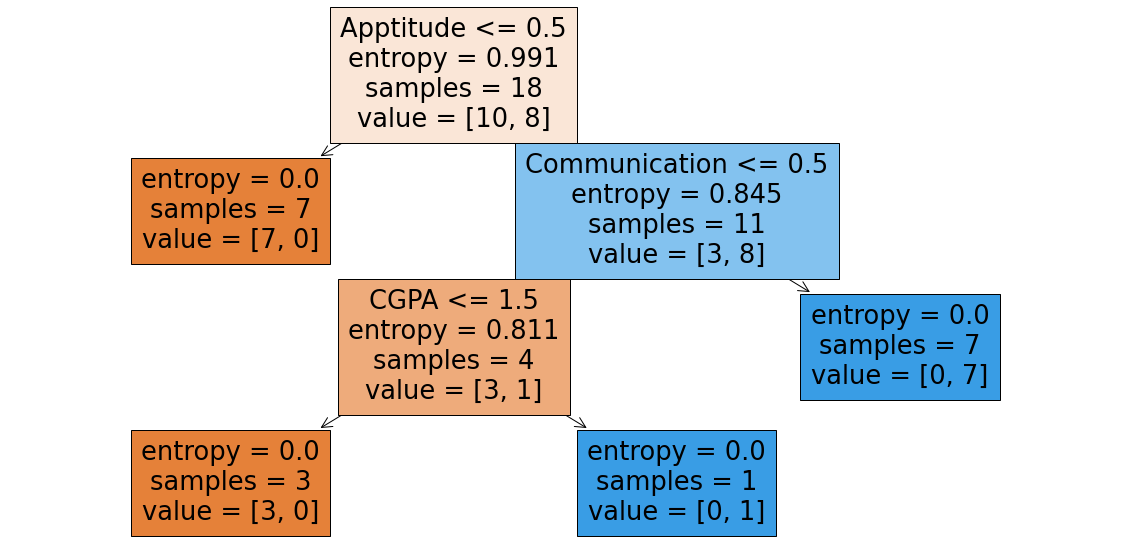

In [152]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=feature, filled=True)
plt.show()

In [50]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
x = df[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','SkinThickness','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [98]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy",max_depth=3) # you can also set "max_depth" in 'criterion' as per your choice to make the tree small
model = dtree.fit(x,y)
dtree.get_depth() # will give count of level

3

In [100]:
feature = list(x.columns)
feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'SkinThickness',
 'DiabetesPedigreeFunction',
 'Age']

In [101]:
from sklearn import tree

text_representation = tree.export_text(dtree, feature_names=feature)
print(text_representation)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- Glucose <= 145.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  145.50
|   |   |   |--- class: 1
|   |--- BMI >  29.95
|   |   |--- Glucose <= 157.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  157.50
|   |   |   |--- class: 1



In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [103]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [104]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 14],
       [19, 36]], dtype=int64)

In [105]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(TN)
print(TP)
print(FN)
print(FP)

85
36
19
14


In [106]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7857142857142857


In [107]:
Sensitivity = TP/(TP + FN)
print(Sensitivity)

0.6545454545454545


In [108]:
Specificity = TN/(TN + FP)
print(Specificity)

0.8585858585858586


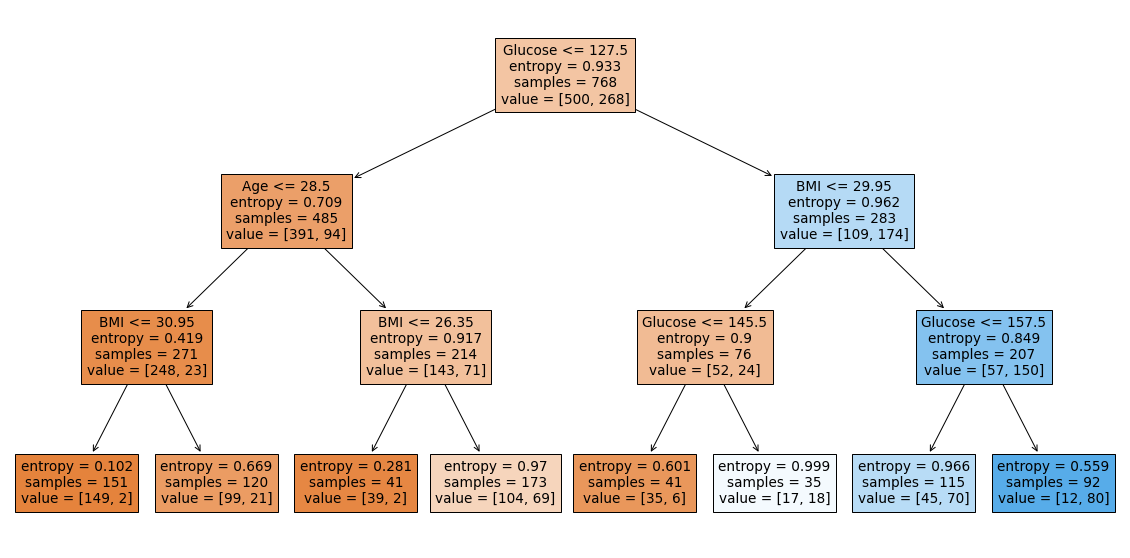

In [109]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=feature, filled=True)
plt.show()

In [154]:
import pandas as pd

df = pd.read_csv("DecisionTree_Sports.csv")
df

,Day,Weather,Temp,Humidity,Wind,Play_Sports
0,Day1,Sunny,Hot,High,Weak,No
1,Day2,Sunny,Hot,High,Strong,No
2,Day3,Cloudy,Hot,High,Weak,Yes
3,Day4,Rainy,Mild,High,Weak,Yes
4,Day5,Rainy,Cool,Normal,Weak,Yes
5,Day6,Rainy,Cool,Normal,Strong,No
6,Day7,Cloudy,Cool,Normal,Strong,Yes
7,Day8,Sunny,Mild,High,Weak,No
8,Day9,Sunny,Cool,Normal,Weak,Yes
9,Day10,Rainy,Mild,Normal,Weak,Yes


In [156]:
import numpy as np

df['Weather'] = np.where(df['Weather'] == 'Sunny',0,np.where(df['Weather'] == 'Cloudy',1,2))

In [158]:
df['Temp'] = np.where(df['Temp'] == 'Hot',0,np.where(df['Temp'] == 'Mild',1,2))

In [160]:
df['Humidity'] = np.where(df['Humidity'] == 'Normal',0,1)

In [161]:
df['Wind'] = np.where(df['Wind'] == 'Weak',0,1)

In [162]:
df

,Day,Weather,Temp,Humidity,Wind,Play_Sports
0,Day1,0,0,1,0,No
1,Day2,0,0,1,1,No
2,Day3,1,0,1,0,Yes
3,Day4,2,1,1,0,Yes
4,Day5,2,2,1,0,Yes
5,Day6,2,2,1,1,No
6,Day7,1,2,1,1,Yes
7,Day8,0,1,1,0,No
8,Day9,0,2,1,0,Yes
9,Day10,2,1,1,0,Yes


In [164]:
x = df[['Weather','Temp','Humidity','Wind']]
y = df['Play_Sports']
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [165]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")
model = dtree.fit(x,y)
dtree.get_depth() # will give count of level

4

In [166]:
feature = list(x.columns)
feature

['Weather', 'Temp', 'Humidity', 'Wind']

In [167]:
from sklearn import tree

text_representation = tree.export_text(dtree, feature_names=feature)
print(text_representation)

|--- Weather <= 0.50
|   |--- Temp <= 0.50
|   |   |--- class: No
|   |--- Temp >  0.50
|   |   |--- Temp <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- Temp >  1.50
|   |   |   |--- class: Yes
|--- Weather >  0.50
|   |--- Wind <= 0.50
|   |   |--- class: Yes
|   |--- Wind >  0.50
|   |   |--- Weather <= 1.50
|   |   |   |--- class: Yes
|   |   |--- Weather >  1.50
|   |   |   |--- class: No



In [171]:
y_pred = model.predict(x)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [172]:
diff = pd.DataFrame({'Actual':y, 'Predicted':y_pred})
diff

,Actual,Predicted
0,No,No
1,No,No
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,No,No
6,Yes,Yes
7,No,No
8,Yes,Yes
9,Yes,Yes


In [173]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[5, 0],
       [0, 9]], dtype=int64)

In [174]:
TN = cm[0][0] #True Negetive
TP = cm[1][1] #True Positive
FN = cm[1][0] #False Negetive
FP = cm[0][1] #False Positive
print(TN)
print(TP)
print(FN)
print(FP)

5
9
0
0


In [175]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y, y_pred))

Accuracy:  1.0


In [176]:
Sensitivity = TP/(TP + FN)
print(Sensitivity)

1.0


In [177]:
Specificity = TN/(TN + FP)
print(Specificity)

1.0


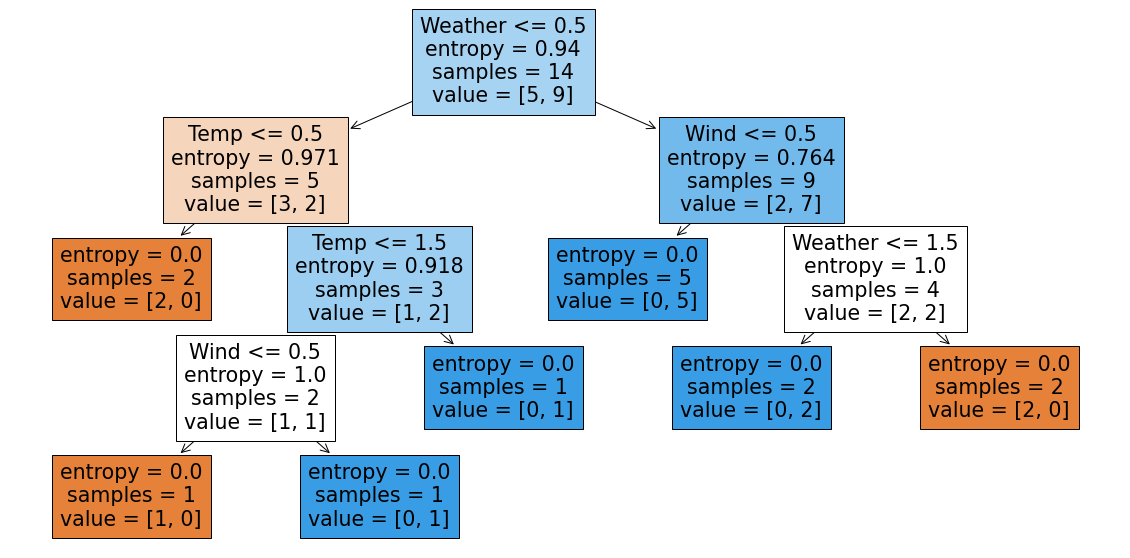

In [178]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=feature, filled=True)
plt.show()